In [ ]:
# first we import the dataset, combine it, concatenate it and then we do Preprocessing

In [ ]:
# importing data
from google.colab import data_table
from google.colab import drive
# Enable the interactive table feature
data_table.enable_dataframe_formatter()
# Access Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import important libraries and packages
!pip install kmodes
!pip install kmodes --upgrade
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN

from sklearn.decomposition import PCA

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas.plotting import parallel_coordinates

import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
#  folder where the data is, read_csv function, apply delimiter to separate the semicolon
# file_paths = ["/content/drive/MyDrive/820_UnsuperML/bank.csv", "/content/drive/MyDrive/820_UnsuperML/bank-full.csv","/content/drive/MyDrive/820_UnsuperML/bank-additional.csv","/content/drive/MyDrive/820_UnsuperML/bank-additional-full.csv"]
# file 1
file_path1 = '/content/drive/MyDrive/820_UnsuperML/bank-full.csv'
df1 = pd.read_csv(file_path1, delimiter=';')
df1
df1.info()
# file 2
file_path2 = '/content/drive/MyDrive/820_UnsuperML/bank.csv'
df2 = pd.read_csv(file_path1, delimiter=';')
df2
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 

In [ ]:
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df
# make a copy of original data
original_data = combined_df.copy()
print(original_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90422 entries, 0 to 90421
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        90422 non-null  int64 
 1   job        90422 non-null  object
 2   marital    90422 non-null  object
 3   education  90422 non-null  object
 4   default    90422 non-null  object
 5   balance    90422 non-null  int64 
 6   housing    90422 non-null  object
 7   loan       90422 non-null  object
 8   contact    90422 non-null  object
 9   day        90422 non-null  int64 
 10  month      90422 non-null  object
 11  duration   90422 non-null  int64 
 12  campaign   90422 non-null  int64 
 13  pdays      90422 non-null  int64 
 14  previous   90422 non-null  int64 
 15  poutcome   90422 non-null  object
 16  y          90422 non-null  object
dtypes: int64(7), object(10)
memory usage: 11.7+ MB
None


In [ ]:
# Remove duplicates
combined_df.drop_duplicates(inplace=True)

In [ ]:
# check base information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [ ]:
print(combined_df.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [ ]:
# Check the missing value
print(combined_df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
print(combined_df.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


Data Dictionary
Age: Customer Age

Job: Type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)

Marital: Marital status (divorced,married,single,unknown; note: divorced means divorced or widowed)

Education: Education Level(Basic_4_year, Basic_6_year, Basic_9_year, High-School, Illiterate, Professional_course, University_Degree, Unknown)

Default: Has credit in default

Balance: Average yearly balance

Housing: Has housing loan?

Loan: Has personal loan?

Contact: Contact Communication Type (Cellular, Telephone)

Day_of_Week: Last contact day of the week.

Month: Last contact month of year.

Duration: Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

previous: Number of contacts performed before this campaign and for this client.

poutcome: Outcome of the previous marketing campaign (failure,nonexistent,success)

Y: Has the client subscribed a term deposit?

# **Data Exploration**


**We will explore data to look for patterns, skewness, any outstanding element that we can look for visually in Histogram**

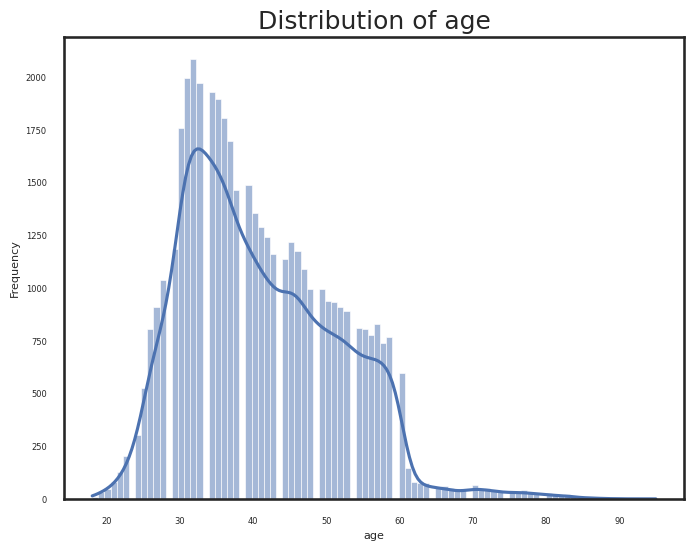

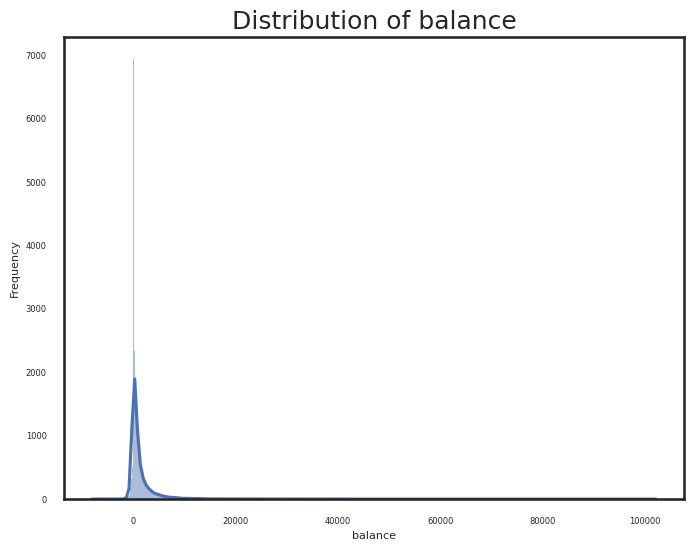

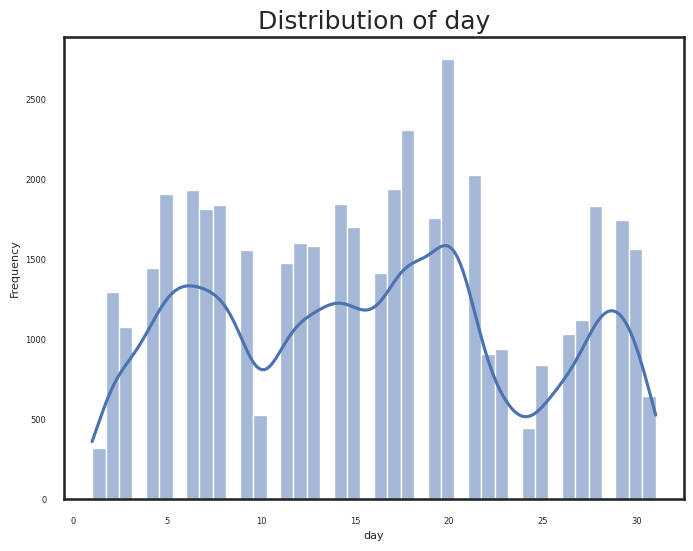

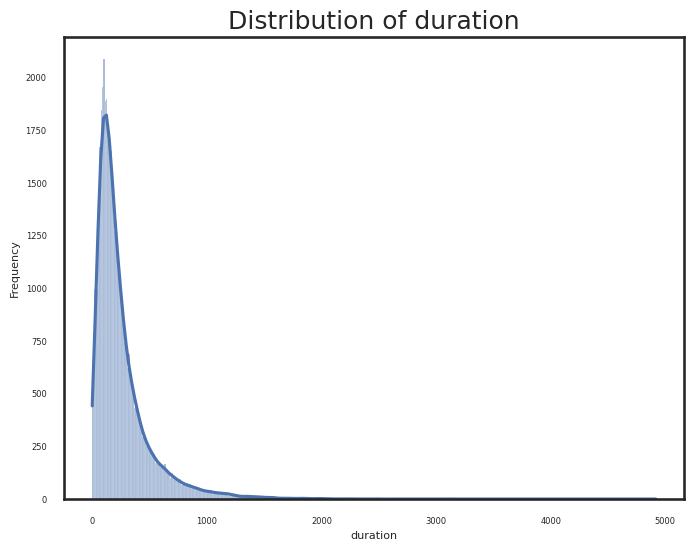

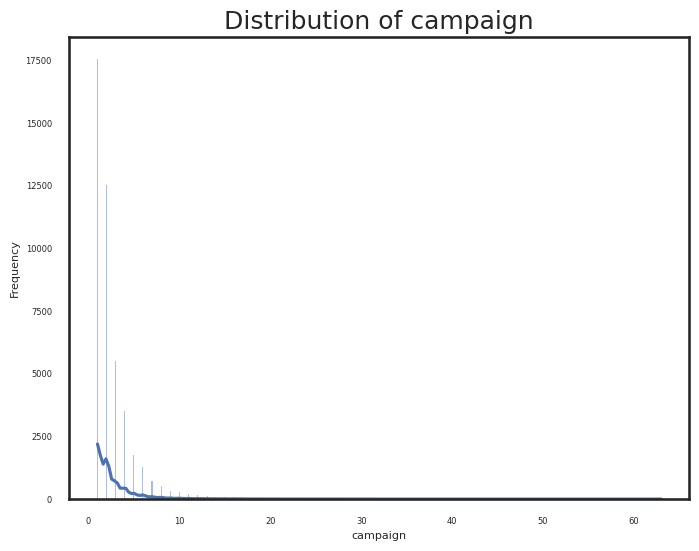

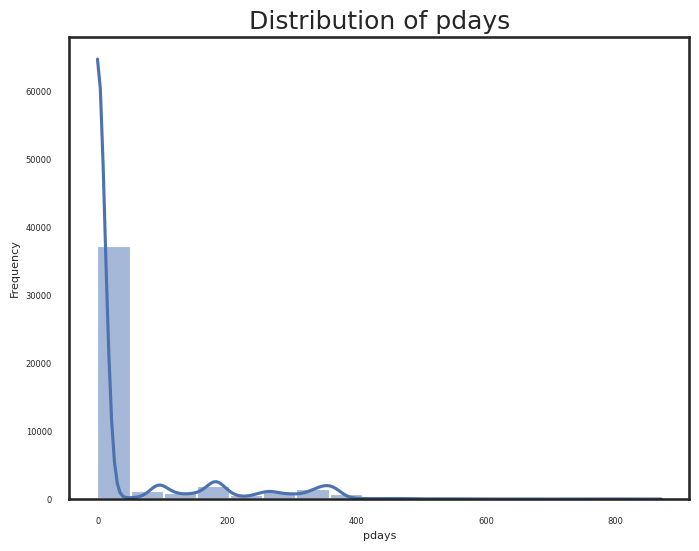

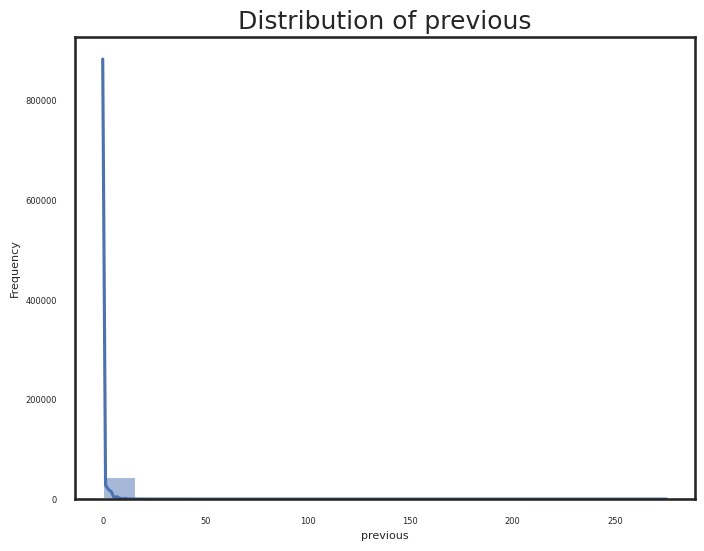

In [ ]:
# prompt: show the distribution of all numeric data, make the x and y axis label smaller, now make the x and y axis legend smaller

# Assuming 'combined_df' is your DataFrame
numeric_cols = combined_df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    sns.histplot(combined_df[col], kde=True)
    plt.title(f'Distribution of {col}')

    # Reduce x and y axis label size
    plt.xlabel(col, fontsize=8)
    plt.ylabel('Frequency', fontsize=8)

    # Reduce x and y axis tick label size
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    plt.show()


Our observations are below:

1. Age appears to the rightly skewed, most of the data points gather around 25 and 60, and there are fewer older individuals in the data, since older individuals are less frequent, we can also focus on them in our analysis.

2. Balance: The data looks very spread out, with values ranging from 0 - 100,000, most likely contain outliers hence the wide range, it appears that most of the customers have low balance as the histogram suggest most of the values are concentrated around 0 - 30,000 values. Now this is another variable for interest for us because we detect outliers here.

3. Duration: This is duration of the calls, and it seems that most calls are in range of 0-600 seconds, but it seems that there are some calls that lasted from range 600-2000 seconds.

4. P days: Many customers where not contacted for days more than 50 days have passed.

5. Previous: We can observe that it is rightly skewed, number of contacts contacted are less, but they fall into range of 0- 20. We will look into this variable later on.

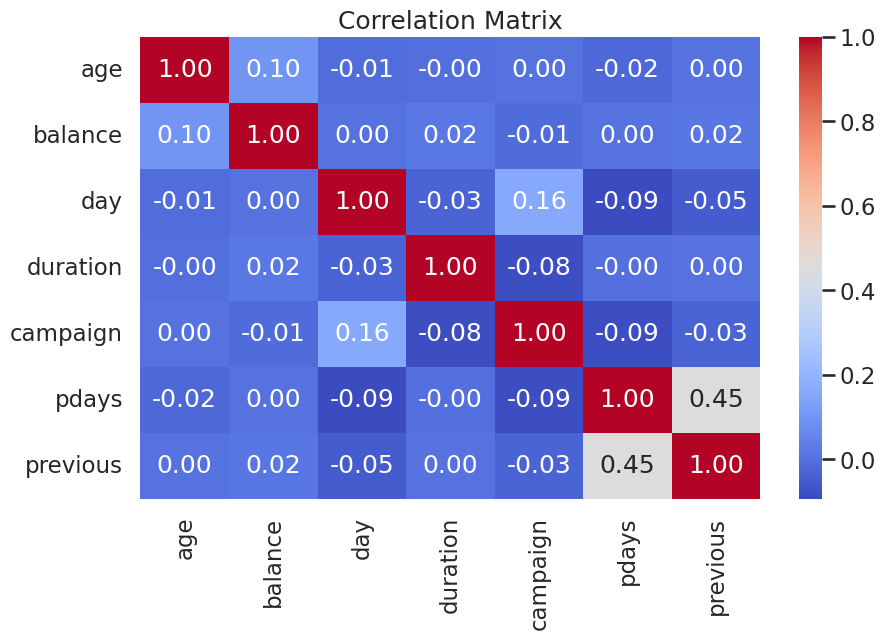

In [ ]:
# Selecting  numeric columns
numeric_df = combined_df.select_dtypes(include=[np.number])
# Correlation matrix
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Observations:
We can see that most of the variables are not correlated to each other. This definitely stands out to us. Only previous and pdays are a little correlated to each other. We also see some negative correlations, for example, campaign and p days are negatively correlated, number of contacts and number of days passed after contacting a customer, and duration and campaign is also negatively correlated.

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = combined_df.select_dtypes(include=['object']).columns

#  encoding to categorical columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le

In [ ]:
combined_df = pd.get_dummies(combined_df, drop_first=True)

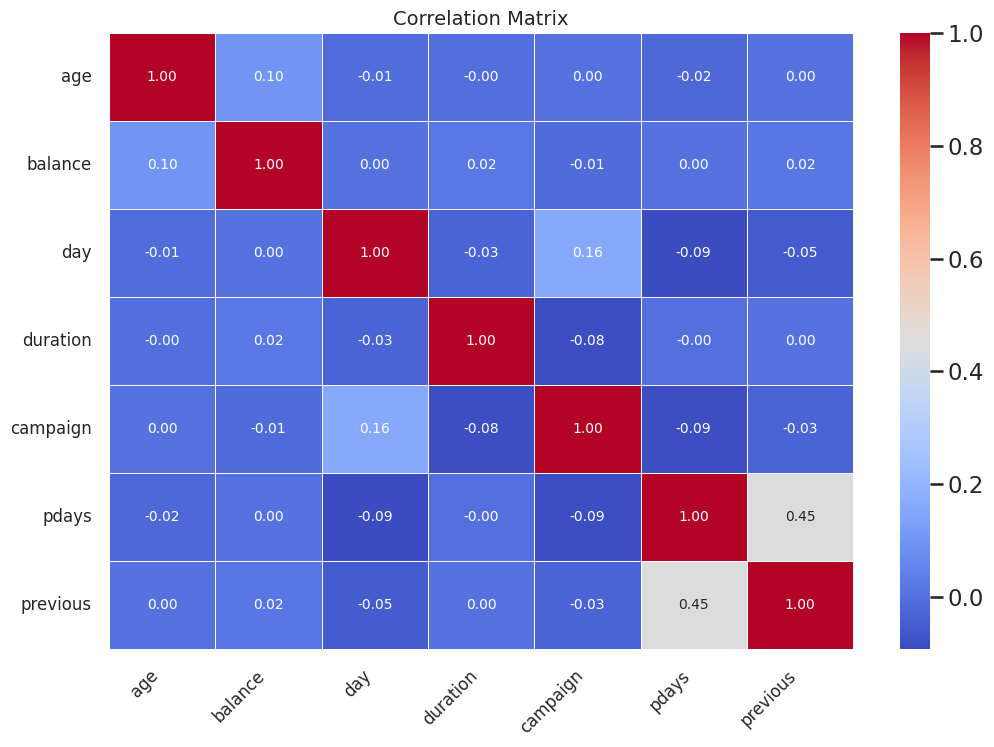

In [ ]:
# Increase figure size
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})  # Smaller text

# Rotate x-axis and y-axis labels
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title("Correlation Matrix", fontsize=14)
plt.show()

In [ ]:
# looking at range of data in each variable
min_val = combined_df.min()
max_val = combined_df.max()
print(min_val)
print(max_val)
combined_df.describe()

age            18
job             0
marital         0
education       0
default         0
balance     -8019
housing         0
loan            0
contact         0
day             1
month           0
duration        0
campaign        1
pdays          -1
previous        0
poutcome        0
y               0
dtype: int64
age              95
job              11
marital           2
education         3
default           1
balance      102127
housing           1
loan              1
contact           2
day              31
month            11
duration       4918
campaign         63
pdays           871
previous        275
poutcome          3
y                 1
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,15.806419,5.523014,258.163080,2.763841,40.197828,0.580323,2.559974,0.116985
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,8.322476,3.006911,257.527812,3.098021,100.128746,2.303441,0.989059,0.321406
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,8.000000,3.000000,103.000000,1.000000,-1.000000,0.000000,3.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,16.000000,6.000000,180.000000,2.000000,-1.000000,0.000000,3.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,21.000000,8.000000,319.000000,3.000000,-1.000000,0.000000,3.000000,0.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,31.000000,11.000000,4918.000000,63.000000,871.000000,275.000000,3.000000,1.000000


In [ ]:
# Identify numerical and categorical features
numerical_features = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

In [ ]:
# unique values in Categorical variables
for col in categorical_features:
    print(f"\nUnique values in {col}:")
    print(combined_df[col].value_counts())


Unique values in job:
job
1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: count, dtype: int64

Unique values in marital:
marital
1    27214
2    12790
0     5207
Name: count, dtype: int64

Unique values in education:
education
1    23202
2    13301
0     6851
3     1857
Name: count, dtype: int64

Unique values in default:
default
0    44396
1      815
Name: count, dtype: int64

Unique values in housing:
housing
1    25130
0    20081
Name: count, dtype: int64

Unique values in loan:
loan
0    37967
1     7244
Name: count, dtype: int64

Unique values in contact:
contact
0    29285
2    13020
1     2906
Name: count, dtype: int64

Unique values in month:
month
8     13766
5      6895
1      6247
6      5341
9      3970
0      2932
3      2649
4      1403
10      738
11      579
7       477
2       214
Name: count, dtype: int64

Unique values in poutcome:
poutcome
3    36959
0     4901
1     1840
2   

In [ ]:
combined_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
5,35,4,1,2,0,231,1,0,2,5,8,139,1,-1,0,3,0
6,28,4,2,2,0,447,1,1,2,5,8,217,1,-1,0,3,0
7,42,2,0,2,1,2,1,0,2,5,8,380,1,-1,0,3,0
8,58,5,1,0,0,121,1,0,2,5,8,50,1,-1,0,3,0
9,43,9,2,1,0,593,1,0,2,5,8,55,1,-1,0,3,0


In [ ]:
original_data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
# create a mapping for each categorical variable :'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'
combined_df['job'].unique()
job_map= {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}



In [ ]:
# for marital
combined_df['marital'].unique()
marital_map = {'single': 0, 'married': 1, 'divorced': 2}

In [ ]:
# for education: Basic_4_year, Basic_6_year, Basic_9_year, High-School, Illiterate, Professional_course, University_Degree, Unknown)
original_data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
education_mapping = {
    0: 'unknown',# combines illiterate, unknowN
    1: 'primary',  # combines basic.4y, basic.6y, and basic.9y
    2: 'secondary', # combines high school basic 9 yeaR
    3: 'tertiary' # PROFESSIONAL COURSE UNIVERSITY DEGREE
}

In [ ]:
# for default
combined_df.groupby('default')['balance'].mean()
combined_df['default'].value_counts()
combined_df['default'].unique()
default_map = {'No': 0, 'Yes': 1,}


In [ ]:
# for housing
combined_df['housing'].unique()
housing_map = {'No': 0, 'Yes': 1,}

In [ ]:
# for loan
combined_df['loan'].unique()
combined_df.groupby('loan')['balance'].mean()
combined_df['loan'].value_counts()
loan_map = {'No': 0, 'Yes': 1,}



In [ ]:
# for month
combined_df['month'].unique()
month_map = {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may':8, 'nov': 9, 'oct': 10, 'sep': 11}


In [ ]:
# for poutcome
original_data['poutcome'].unique()
poutcome_map = {'unknown': 0, 'failure': 1, 'success': 2, 'other': 3}

In [ ]:
# for simple observation

original_data.to_excel('original_data.xlsx', index=False)
combined_df.to_excel('combined_df.xlsx', index=False)

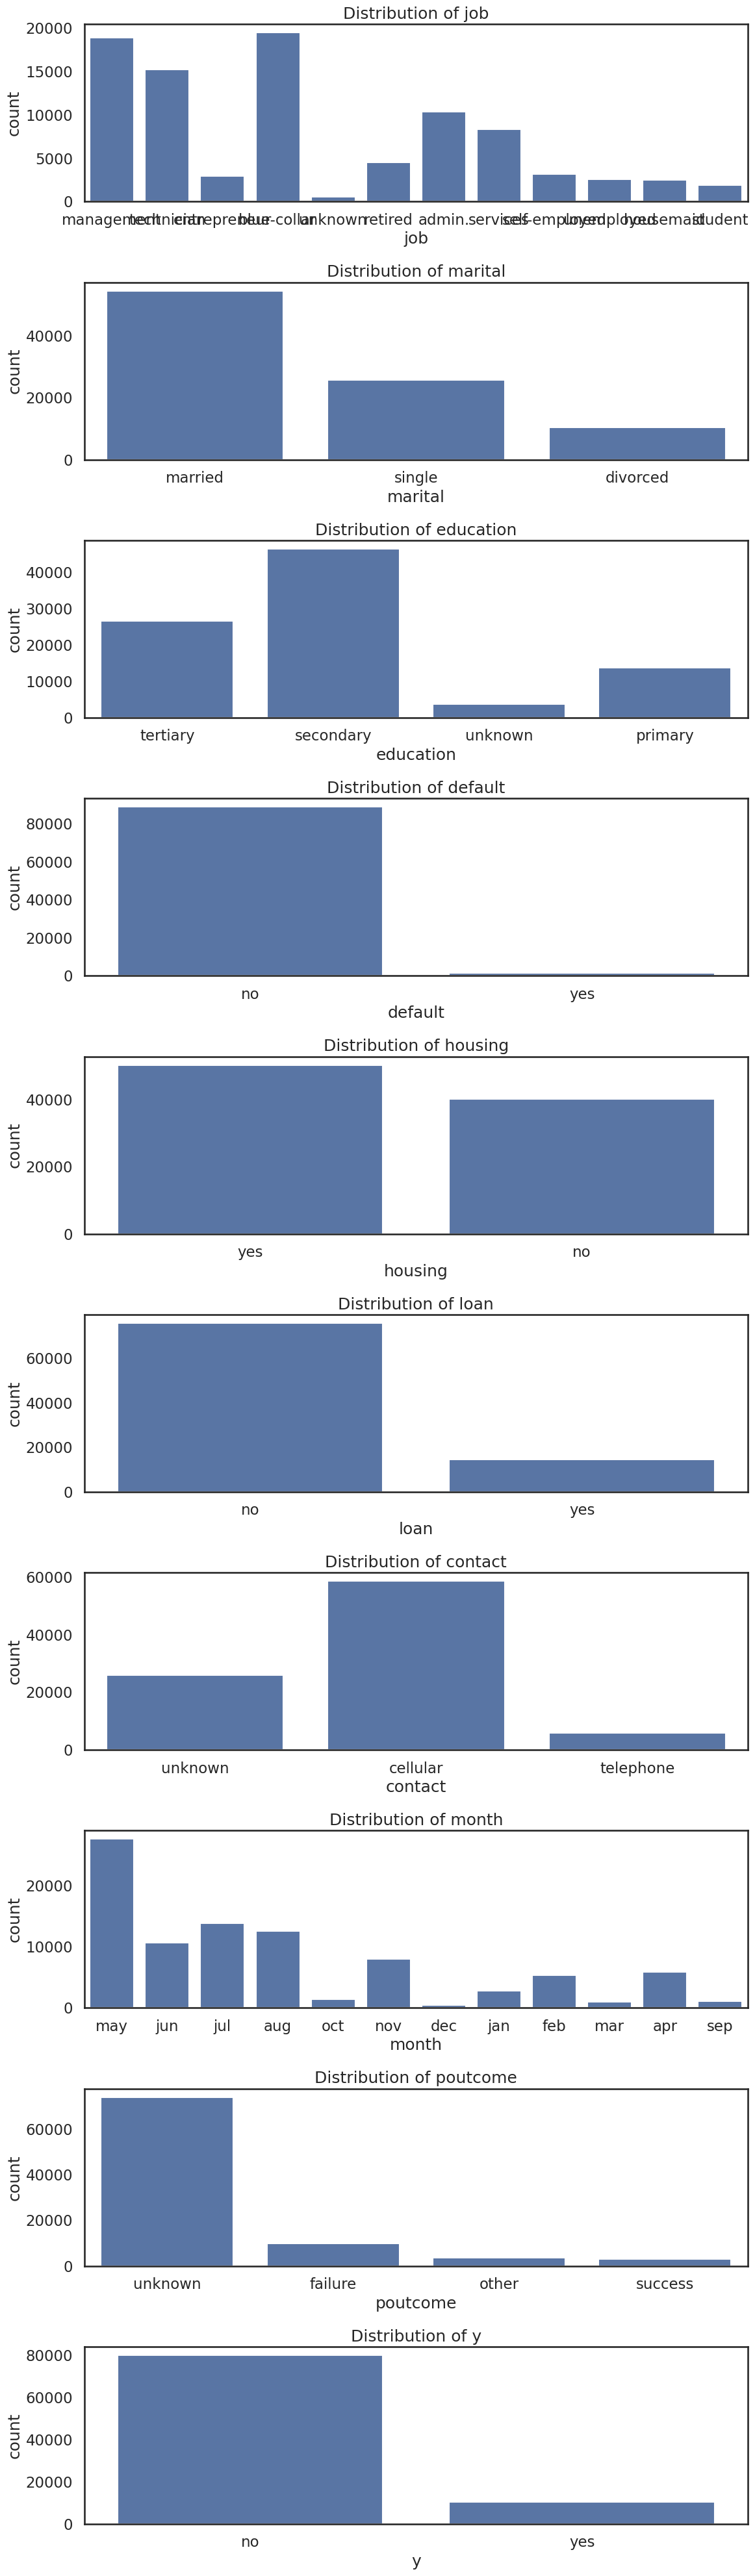

In [ ]:
# distribution of categorical variables using original data so that we can view the distribution without encoding, it makes it easier to  understand
plt.figure(figsize=(12, len(categorical_columns) * 4))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(data=original_data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Observations: 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'
1. Job:


In [ ]:
# add a user id to tie back to userid to identify people with specific characteristics
original_data_new = original_data.copy()

In [ ]:
original_data_new['user_id'] = range(1, len(original_data_new)+ 1)
print(original_data_new.head(2))

   age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  user_id  
0    5   may       261         1     -1         0  unknown  no        1  
1    5   may       151         1     -1         0  unknown  no        2  


In [ ]:
#
combined_df['education'].unique()
combined_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,0,825,0,0,0,17,9,977,3,-1,0,3,1
45207,71,5,0,0,0,1729,0,0,0,17,9,456,2,-1,0,3,1
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2,1
45209,57,1,1,1,0,668,0,0,1,17,9,508,4,-1,0,3,0


In [ ]:
print(combined_df.head(10))

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   
5   35    4        1          2        0      231        1     0        2   
6   28    4        2          2        0      447        1     1        2   
7   42    2        0          2        1        2        1     0        2   
8   58    5        1          0        0      121        1     0        2   
9   43    9        2          1        0      593        1     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  
0    5      8       261         1     -1         0         3  0  
1    5      8       

In [ ]:
# Encode categorical features
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le  # Store encoders for reference



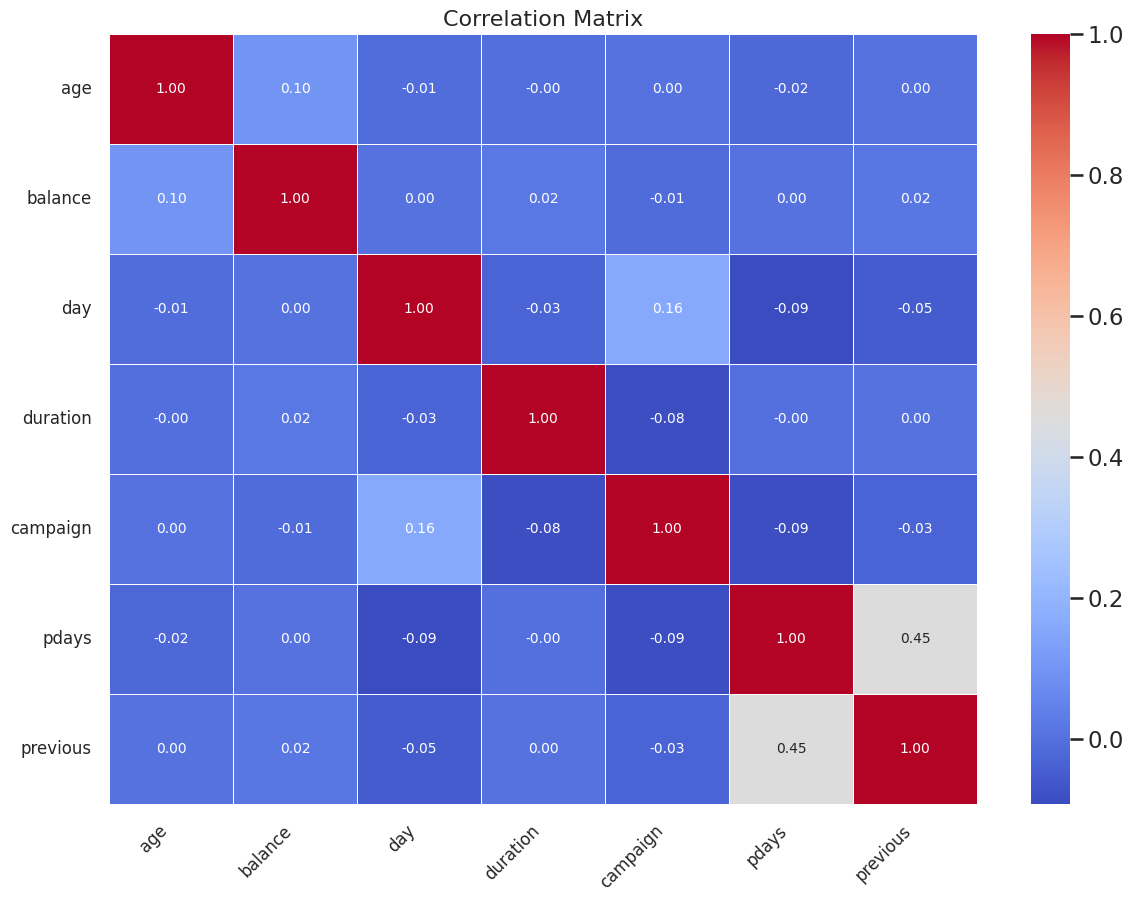

In [ ]:
# Increase figure size and adjust font sizes for better readability
plt.figure(figsize=(14, 10))  # Increased figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, annot_kws={"size": 10})

# Rotate x-axis and y-axis labels with increased font size
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title("Correlation Matrix", fontsize=16) # Increased title font size
plt.show()


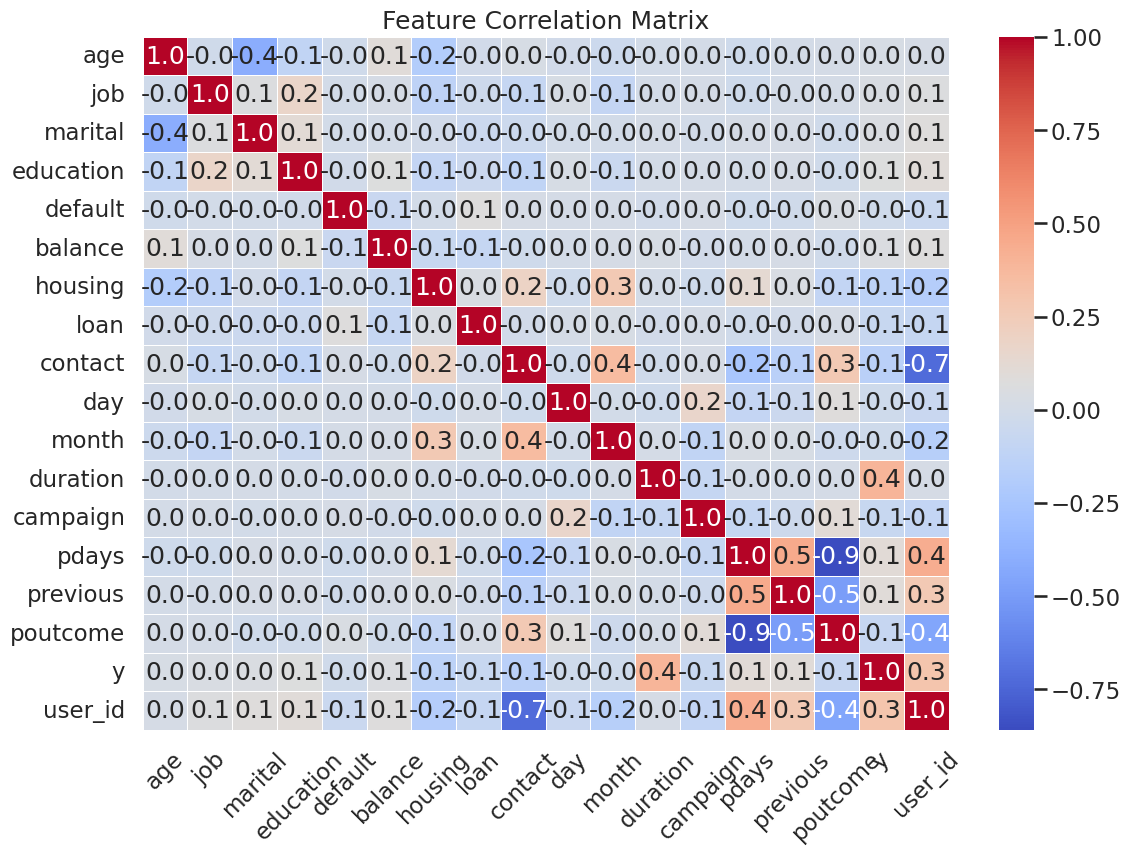

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(13, 9))
sns.heatmap(combined_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".1f")
plt.title("Feature Correlation Matrix")
plt.xticks(rotation=45)
plt.show()

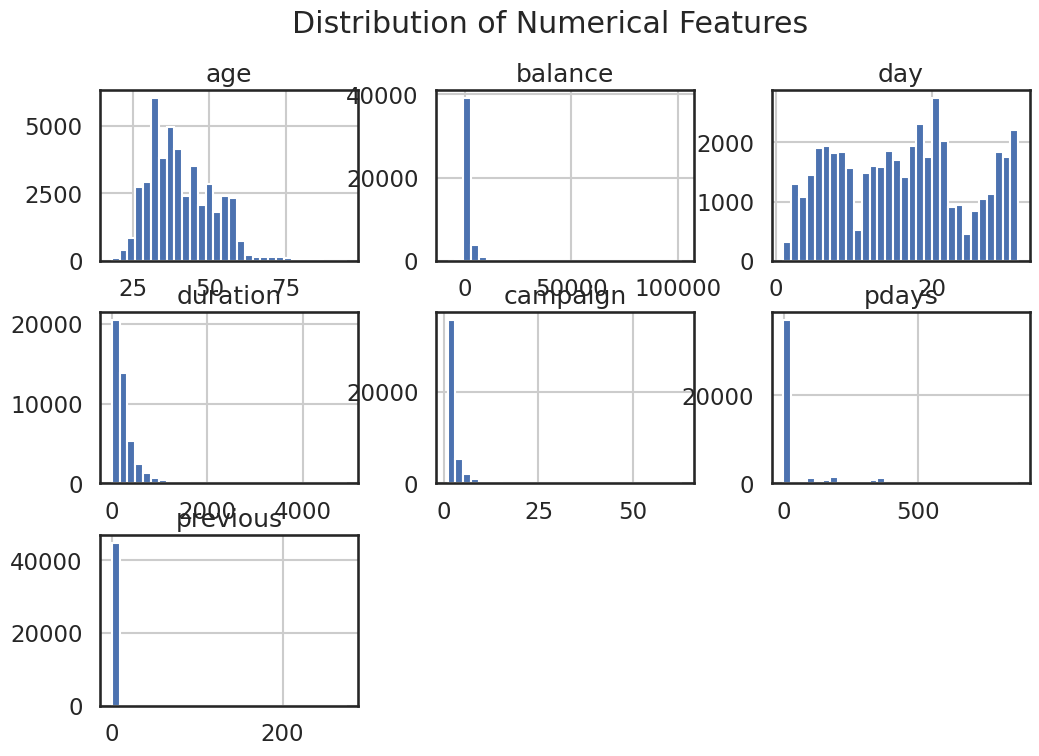

In [ ]:

# Histograms for numerical features
combined_df[numerical_features].hist(figsize=(12, 8), bins=30)
plt.suptitle("Distribution of Numerical Features")
plt.show()

**Adding a user id for clusters to identify the people in this cohort**

In [ ]:
# adding a user id to the dataset
# print(combined_df.head(5))

#adding a user id
combined_df['user_id'] = range(1, len(combined_df)+ 1)
print(combined_df.head(5))

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  user_id  
0    5      8       261         1     -1         0         3  0        1  
1    5      8       151         1     -1         0         3  0        2  
2    5      8        76         1     -1         0         3  0        3  
3    5      8        92         1     -1         0         3  0        4  
4    5      8       198         1     -1         0         3  0        5  


In [ ]:
# rename the dataset with user id
combined_user = combined_df.copy

Clustering Method (DBSCAN) to assess numeric columns to look at density based clusters

In [ ]:
# importing libraries for running dbscan
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from pandas import DataFrame

Consider from here


DBSCAN method: DBSCAN is a clustering algorigthm designed to identify outliers.
I am trying to identify outliers in my dataset to separate out outstanding individuals so that we can understand their type and create marketing strategies or look into policies to address why these individuals are outstanding out in our dataset.

DBSCAN method requires two important parameters:
1. Epsilon: the maximum distance to be considered for two points
2. Minimum points: the minimum number of points required to form a dense region <1>

I have considered these variables because for age and balance I saw some outliers in the data distribution and I want to explore categorical variables to describe what kind of individuals they may be.

In [ ]:
# selection of required columns
df_separate = combined_df[['age', 'job', 'marital', 'education','balance', 'housing', 'loan']]

For, different kind of categorical variables we have different kind of levels or representation of data, for eg education is level wise, but loan is yes and no, so I am going to treat categorical variable differently.
So, according to my research on different kind of encoding for differentkind of categorical variable, I am going to apply, One hot encoding for Job, Marital. Ordinal for Education because that is level wise. We keep the age and balance variable the same.

I will preprocess my data, keep numerical features as it is, but use One hot enocder, ordinal encoder, binary features, I have checked the mapping for variables.

In [ ]:
# # applying encoding on categorical variable using mapping in the codes above
# housing_map = {'No': 0, 'Yes': 1}
# loan_map = {'No': 0, 'Yes': 1}
# education_mapping = {
#     0: 'unknown',# combines illiterate, unknowN
#     1: 'primary',  # combines basic.4y, basic.6y, and basic.9y
#     2: 'secondary', # combines high school basic 9 yeaR
#     3: 'tertiary' # PROFESSIONAL COURSE UNIVERSITY DEGREE
# }

In [ ]:
# check the mapping quickly
# combined_df['job'].unique()
# combined_df['marital'].unique()
# combined_df['education'].unique()
# combined_df['housing'].unique()
# combined_df['loan'].unique()

In [ ]:
combined_df['marital'].unique()

array([1, 2, 0])

In [ ]:
combined_df['education'].unique()

array([2, 1, 3, 0])

In [ ]:
combined_df['housing'].unique()

array([1, 0])

In [ ]:
combined_df['loan'].unique()

array([0, 1])

In [ ]:
print(combined_df.head(5))

   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  y  user_id  
0    5      8       261         1     -1         0         3  0        1  
1    5      8       151         1     -1         0         3  0        2  
2    5      8        76         1     -1         0         3  0        3  
3    5      8        92         1     -1         0         3  0        4  
4    5      8       198         1     -1         0         3  0        5  


In [ ]:
# scaler: columns to scale
scale_columns= ['age', 'job', 'marital', 'education','balance', 'housing', 'loan' ]

In [ ]:
numerical_features = ['age', 'balance']
categorical_features = ['job', 'marital', 'education', 'housing', 'loan']

# Apply preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
data_combo = preprocessor.fit_transform(combined_df)

In [ ]:
onehot_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
all_features = numerical_features + onehot_features

In [ ]:
# fit and transform the data for dbscan code
data = preprocessor.fit_transform(combined_df)

# Initialize dbcsna
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data)
data_df = combined_df.copy()

# data_df = pd.DataFrame(data)

# combined_user['clusters'] = clusters

# print(data_df['clusters'].value_counts())
# print(data_df.head(5))

In [ ]:
data_df['clusters'] = clusters


In [ ]:
# identify outliers
outliers = data_df[data_df['clusters'] == -1]
outlier_ids = outliers['user_id'].tolist()
print(f'Number of outliers: {len(outliers)}')
print(f"Percentage of outliers: {len(outliers) / len(data_df) * 100:.2f}%")


Number of outliers: 2940
Percentage of outliers: 6.50%


In [ ]:
# get a list of outlier ids
outlier_ids = outliers['user_id'].tolist()
print(outlier_ids)

[25, 70, 71, 89, 113, 121, 187, 204, 218, 292, 296, 313, 335, 355, 383, 447, 453, 494, 517, 521, 529, 566, 583, 593, 617, 629, 631, 758, 809, 862, 877, 892, 895, 909, 917, 921, 991, 1019, 1024, 1070, 1073, 1097, 1116, 1121, 1141, 1158, 1199, 1211, 1214, 1237, 1293, 1302, 1303, 1308, 1402, 1439, 1471, 1491, 1542, 1618, 1621, 1703, 1766, 1789, 1815, 1834, 1841, 1844, 1897, 1918, 1947, 1965, 1998, 2005, 2009, 2035, 2042, 2049, 2056, 2066, 2092, 2260, 2290, 2326, 2344, 2369, 2408, 2457, 2475, 2480, 2493, 2546, 2549, 2555, 2556, 2571, 2577, 2579, 2595, 2605, 2612, 2619, 2620, 2679, 2707, 2714, 2724, 2760, 2776, 2779, 2780, 2792, 2834, 2842, 2849, 2853, 2863, 2900, 2909, 2919, 2925, 2939, 2947, 2952, 2954, 2956, 2958, 2981, 3006, 3011, 3013, 3016, 3025, 3062, 3090, 3100, 3118, 3146, 3153, 3170, 3190, 3197, 3198, 3226, 3234, 3241, 3242, 3266, 3305, 3322, 3325, 3328, 3335, 3338, 3352, 3371, 3388, 3399, 3416, 3450, 3452, 3467, 3487, 3498, 3510, 3512, 3541, 3559, 3561, 3597, 3602, 3605, 3613, 36

In [ ]:
# find characteristics of these people
outlier_data = combined_df[combined_df['user_id'].isin(outlier_ids)]
print(outlier_data)

       age  job  marital  education  default  balance  housing  loan  contact  \
24      40    5        1          0        0        0        1     1        2   
69      35    1        2          1        0    12223        1     1        2   
70      57    1        1          1        0     5935        1     1        2   
88      46    4        0          1        0       16        1     1        2   
112     56    6        1          0        0      -34        1     1        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45140   63    2        1          1        0     3904        0     0        1   
45141   77   11        1          3        0      397        0     0        1   
45164   35    7        1          2        0     4655        0     0        0   
45185   60    7        1          2        0     4256        1     0        0   
45191   75    5        0          2        0     3810        1     0        0   

       day  month  duration

In [ ]:
# understand these outliers so that we can understand their habits, characteristics and personalize or create specific marketing strategies

print(original_data_new.head(2))

   age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome   y  user_id  
0    5   may       261         1     -1         0  unknown  no        1  
1    5   may       151         1     -1         0  unknown  no        2  


In [ ]:
# make a list of cluster labels and user id from outlier_data , and merge it with original data where we have our original data with characterisitcs mappped to each variable

cluster_user_ids = outlier_data['user_id']
print(cluster_user_ids.info())

# get data from original data
outlier_data_extract = original_data_new[original_data_new['user_id'].isin(cluster_user_ids)]


# just get cluster_id and match it with our original data
# outlier_data_id = outlier_data[['user_id']]
# print(outlier_data_id.head(5))

<class 'pandas.core.series.Series'>
Index: 2940 entries, 24 to 45191
Series name: user_id
Non-Null Count  Dtype
--------------  -----
2940 non-null   int64
dtypes: int64(1)
memory usage: 45.9 KB
None


In [ ]:
print(outlier_data_extract.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2940 entries, 24 to 45191
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        2940 non-null   int64 
 1   job        2940 non-null   object
 2   marital    2940 non-null   object
 3   education  2940 non-null   object
 4   default    2940 non-null   object
 5   balance    2940 non-null   int64 
 6   housing    2940 non-null   object
 7   loan       2940 non-null   object
 8   contact    2940 non-null   object
 9   day        2940 non-null   int64 
 10  month      2940 non-null   object
 11  duration   2940 non-null   int64 
 12  campaign   2940 non-null   int64 
 13  pdays      2940 non-null   int64 
 14  previous   2940 non-null   int64 
 15  poutcome   2940 non-null   object
 16  y          2940 non-null   object
 17  user_id    2940 non-null   int64 
dtypes: int64(8), object(10)
memory usage: 436.4+ KB
None


In [ ]:

print(outlier_data_extract)

       age            job   marital  education default  balance housing loan  \
24      40        retired   married    primary      no        0     yes  yes   
69      35    blue-collar    single  secondary      no    12223     yes  yes   
70      57    blue-collar   married  secondary      no     5935     yes  yes   
88      46     management  divorced  secondary      no       16     yes  yes   
112     56  self-employed   married    primary      no      -34     yes  yes   
...    ...            ...       ...        ...     ...      ...     ...  ...   
45140   63   entrepreneur   married  secondary      no     3904      no   no   
45141   77        unknown   married    unknown      no      397      no   no   
45164   35       services   married   tertiary      no     4655      no   no   
45185   60       services   married   tertiary      no     4256     yes   no   
45191   75        retired  divorced   tertiary      no     3810     yes   no   

         contact  day month  duration  

Next step is to identify these individuals.

Now that we have identified them, lets delve into who are they, what are their characteristics.

In [ ]:
# LETS START EXPLORING WHAT THE OUTLIER DATA TELLS US
# lets look for those who are these individuals

min_age = outlier_data_extract['age'].min()
max_age = outlier_data_extract['age'].max()
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

min_balance = outlier_data_extract['balance'].min()
max_balance = outlier_data_extract['balance'].max()
print(f"Minimum balance: {min_balance}")
print(f"Maximum balance: {max_balance}")



Minimum age: 19
Maximum age: 95
Minimum balance: -8019
Maximum balance: 102127


**Observations**: We can see that the maximum age a person has in this dataset of outliers is **95** and the minimum age is **19**. The minimum balance for a client is **€ -8019** and maximum balance a client is having is **€ 102,127**.

In [ ]:
outlier_data_extract['job'].unique()

array(['retired', 'blue-collar', 'management', 'self-employed',
       'technician', 'services', 'student', 'unemployed', 'unknown',
       'admin.', 'housemaid', 'entrepreneur'], dtype=object)

**Observations:** We can see that we have retired, blue-collar, managements, self employed, technician, services, student and unemployed and admin type of professional who have account with this bank.

**Let's look at the profile of the person with the highest and lowest wealth in the outliers data.**

In [ ]:
idx_max_blnc = outlier_data_extract['balance'].idxmax()
row_with_max_balance = outlier_data_extract.loc[idx_max_blnc]
print(row_with_max_balance)

age                  51
job          management
marital          single
education      tertiary
default              no
balance          102127
housing              no
loan                 no
contact        cellular
day                   3
month               jun
duration             90
campaign              1
pdays                -1
previous              0
poutcome        unknown
y                    no
user_id           39990
Name: 39989, dtype: object


**Observations**: We can see that the person with the highest wealth in this cohort is single, works as a management professional, education wise he/she has a university degree or a professional course done in the past. He/she doesn't have a housing or a personal loan.

In [ ]:
idx_min_blnc = outlier_data_extract['balance'].idxmin()
row_with_min_balance = outlier_data_extract.loc[idx_min_blnc]
print(row_with_min_balance)

age                   26
job          blue-collar
marital           single
education      secondary
default              yes
balance            -8019
housing               no
loan                 yes
contact         cellular
day                    7
month                jul
duration             299
campaign               3
pdays                 -1
previous               0
poutcome         unknown
y                     no
user_id            12910
Name: 12909, dtype: object


**Observations:** This person is 26 years old, has the lowest balance in the outliers data, is single, he/she do have a personal loan but no housing loan, and he/she have secondary level education, and works on blue-collar job.

In [ ]:
balance_range = outlier_data_extract['balance'].max() - outlier_data_extract['balance'].min()
balance_range

110146

Observations: The range of values for Balance: €110,146. In Portugal's banking system, even a €110,146 would be considered a substantial personal account balance. Portuguese banks are generally stable and well-capitalized, with the banking sector showing strong performance in recent years. Portuguese banks increased their CET1 capital ratio by 104 basis points over the first three quarters of 2023 to 16.4%, indicating improved financial strength.<sup>1</sup> The Portuguese banking system is characterized by a mix of private national retail banks, cooperative banks, and international banks, with over 150 banks operating nationwide.<sup>2</sup><sup>,</sup><sup>3</sup>

Portuguese banks are primarily deposit-funded, with deposits more than fully funding loan books, resulting in ample liquidity. This contributes to the overall stability of the banking system.<sup>3</sup>

In [ ]:
outlier_data_extract.to_excel('outlier_data_extract.xlsx', index=False)

## **Now we look at top 10% of the individuals in this dataset.**

In [ ]:
high_threshold = outlier_data_extract['balance'].quantile(0.90)
high_balance_profiles = outlier_data_extract[outlier_data_extract['balance'] > high_threshold]
high_balance_profiles.shape
high_balance_profiles

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,user_id
334,45,management,divorced,tertiary,no,24598,yes,no,unknown,5,may,313,3,-1,0,unknown,no,335
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,yes,447
920,44,admin.,married,secondary,no,58544,yes,no,unknown,7,may,144,2,-1,0,unknown,no,921
2065,55,retired,married,secondary,no,18722,yes,no,unknown,12,may,128,2,-1,0,unknown,no,2066
2343,26,technician,single,secondary,no,24299,yes,no,unknown,13,may,704,1,-1,0,unknown,no,2344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44232,45,management,married,tertiary,no,31472,no,no,cellular,19,jul,568,7,-1,0,unknown,yes,44233
44438,53,management,married,tertiary,no,18931,no,no,cellular,5,aug,224,1,86,23,other,no,44439
44874,36,unemployed,married,secondary,no,17458,no,no,cellular,23,sep,390,2,-1,0,unknown,no,44875
45019,57,admin.,married,secondary,no,16873,no,no,cellular,14,oct,219,3,372,1,failure,no,45020


This calculates the 90th percentile value for the balance column.
The 90th percentile means that 90% of the clients have a balance below this value, and only the top 10% have a balance above it.
This value (high_threshold) becomes the cutoff for what is considered a high-balance client.
Essentially, this removes the bottom 90% of clients and retains only the top 10% (wealthiest clients).

# **We look at some characteristics of these high balance cases**

count    294.000000
mean      45.986395
std       12.120547
min       23.000000
25%       36.000000
50%       45.000000
75%       55.750000
max       84.000000
Name: age, dtype: float64


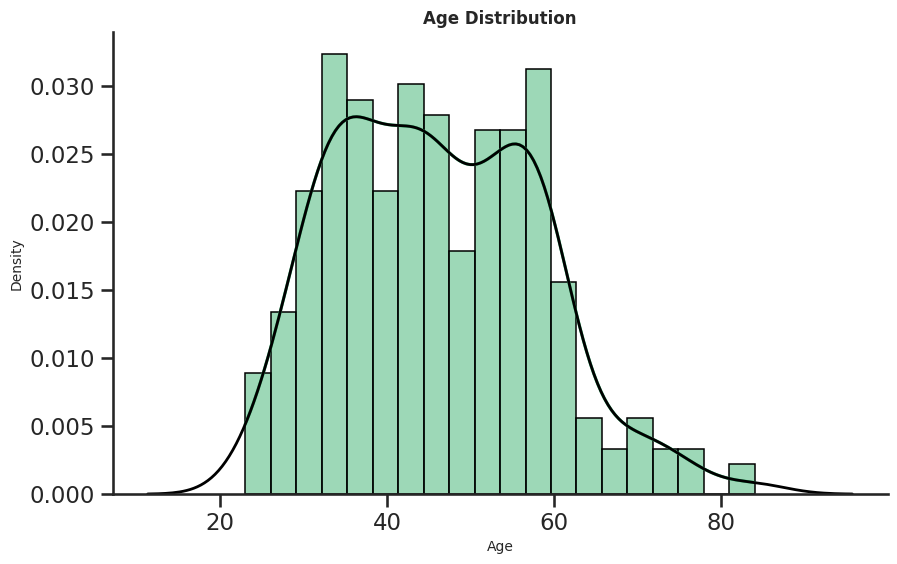

In [ ]:
print(high_balance_profiles['age'].describe())

# Histogram to visualize distribution
# Set a sharp, modern style
sns.set_theme(style="ticks", context="talk")

plt.figure(figsize=(10, 6))

# Create a histogram with a KDE overlay and custom edge widths for crispness
sns.histplot(
    data=high_balance_profiles,
    x='age',
    bins=20,
    kde=True,
    color="mediumseagreen",
    edgecolor="black",
    linewidth=1.1,
    stat="density"
)

# Improve the KDE line appearance
sns.kdeplot(
    data=high_balance_profiles,
    x='age',
    color="black",
    lw=2
)

# Customize titles and labels
plt.title('Age Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Age', fontsize=10)
plt.ylabel('Density', fontsize=10)

# Remove top and right spines for a cleaner look
sns.despine()

plt.show()

**Observations**: We can see  that age distribution appears to be concentrated between 30 and 60 years, with peaks around 40–50 years, Younger individuals (below 30) are relatively fewer in number and may not have accumulated significant wealth yet, presence of older individuals (above 60) suggests a mix of retirees who might also have substantial savings or pension funds.

In [ ]:
retired_high_balance = high_balance_profiles[high_balance_profiles["job"] == "retired"]
retired_high_balance

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,user_id
2065,55,retired,married,secondary,no,18722,yes,no,unknown,12,may,128,2,-1,0,unknown,no,2066
7156,58,retired,married,secondary,no,32948,no,no,unknown,29,may,364,2,-1,0,unknown,no,7157
9421,60,retired,married,primary,no,22018,no,no,unknown,6,jun,177,2,-1,0,unknown,no,9422
9933,60,retired,married,primary,no,17413,no,no,unknown,9,jun,200,1,-1,0,unknown,no,9934
10841,49,retired,single,primary,no,25824,no,no,unknown,17,jun,94,1,-1,0,unknown,no,10842
20853,59,retired,married,secondary,no,25947,no,no,cellular,13,aug,292,2,-1,0,unknown,no,20854
25782,59,retired,married,secondary,no,32948,no,no,cellular,19,nov,243,1,174,2,failure,no,25783
26081,59,retired,married,secondary,no,17769,no,no,cellular,19,nov,322,3,-1,0,unknown,no,26082
27090,59,retired,married,tertiary,no,41242,no,no,cellular,21,nov,161,1,-1,0,unknown,no,27091
31222,61,retired,married,tertiary,no,32685,no,no,cellular,2,mar,1447,2,-1,0,unknown,yes,31223


**Observations:** If we look at retire type job type in this data, then we can see most of the retired people are married, have primary or secondary level education and hold balance ~15k and above, most of them do not have personal loan.

In [ ]:
high_balance_profiles.to_excel('high_balance_profiles.xlsx', index=False)

Distribution: Younger and Older age groups

<ipython-input-542-28b7bffc62a0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_balance_profiles["age_group"] = high_balance_profiles["age"].apply(lambda x: "Older (50+)" if x >= 50 else "Younger (<50)")
<ipython-input-542-28b7bffc62a0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=high_balance_profiles, x="age_group", y="balance", palette="coolwarm")


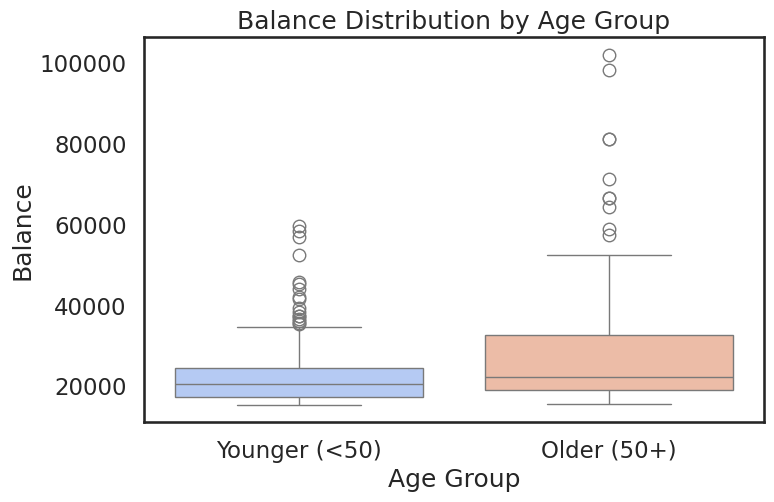

In [ ]:
high_balance_profiles["age_group"] = high_balance_profiles["age"].apply(lambda x: "Older (50+)" if x >= 50 else "Younger (<50)")

# Compare balance between age groups
plt.figure(figsize=(8,5))
sns.set_style("white")
sns.boxplot(data=high_balance_profiles, x="age_group", y="balance", palette="coolwarm")
plt.title("Balance Distribution by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Balance")
plt.show()

# Distribution of Balance for people having and not having Housing Loan


<ipython-input-543-e3e6bf8619a4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=high_balance_profiles, x="housing", y="balance", palette="coolwarm")


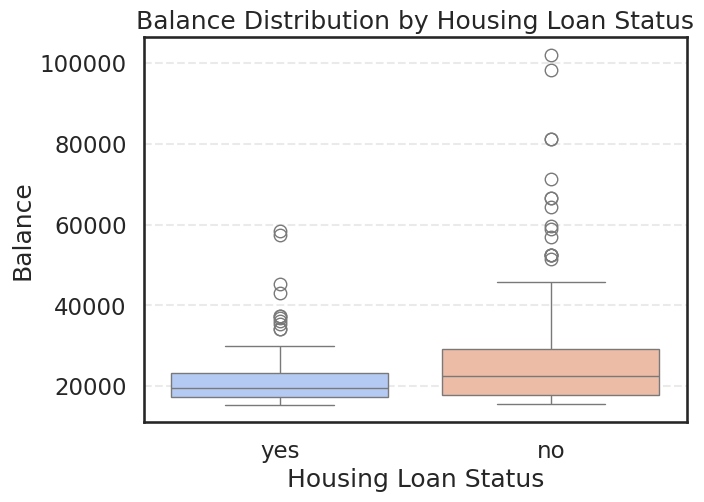

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(data=high_balance_profiles, x="housing", y="balance", palette="coolwarm")
sns.set_style("white")
plt.title("Balance Distribution by Housing Loan Status")
plt.xlabel("Housing Loan Status")
plt.ylabel("Balance")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()

Observations: The median (central line within the box) for those without a housing loan ("no") is higher than for those with a housing loan ("yes").
This suggests that individuals without a housing loan tend to have higher savings or liquidity. Clients with a housing loan tend to have lower median balances, likely due to mortgage payments reducing available savings. Both groups have high-balance outliers, but extreme balances (e.g., over €80,000-100,000) are more common in those without a housing loan.

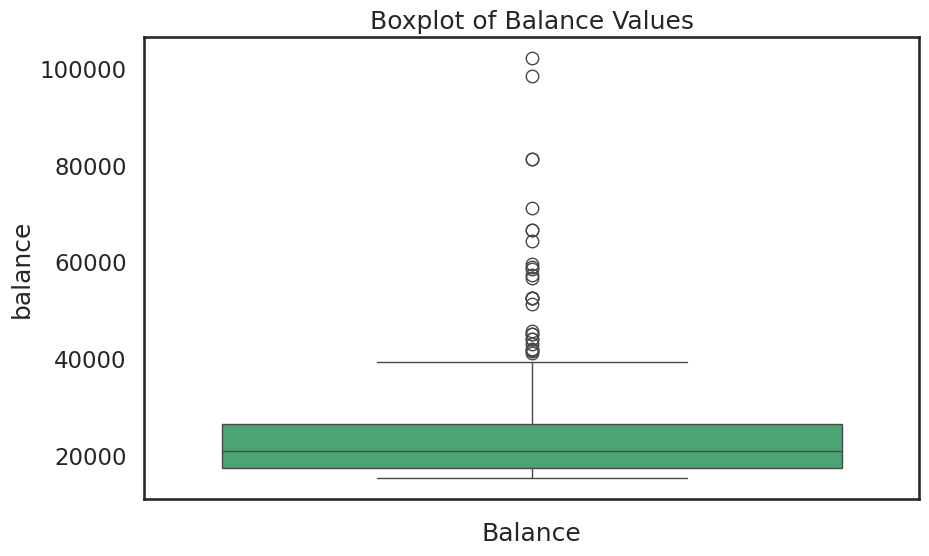

In [ ]:
# looking at histogramof balance distribution
plt.figure(figsize=(10, 6))
sns.boxplot(y=high_balance_profiles["balance"],color="mediumseagreen")
plt.title("Boxplot of Balance Values")
plt.xlabel("Balance")
plt.show()

Observation: This boxplot indicates there are high-value outliers, some exceeding €80,000. A small portion of the client base has extraordinarily high balances (above €60,000–€100,000), likely representing high-net-worth individuals.

# **Analysis of cohort with outstanding characteristics**

In [ ]:
outlier_persona = outlier_data_extract.copy()

In [ ]:
df_outliers = outlier_persona.copy()
df_outliers.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'user_id'],
      dtype='object')

In [ ]:
columns_to_remove = ['contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']

# Drop the columns
df_outliers = df_outliers.drop(columns=columns_to_remove, errors='ignore')

# Confirm the columns are removed
print("Remaining Columns:", df_outliers.columns)

Remaining Columns: Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'user_id'],
      dtype='object')


In [ ]:
# encoding categorical variables
categorical_cols = ["job", "marital", "education", "default", "housing", "loan"]
numerical_cols = ["age", "balance"]

In [ ]:
df_outliers[categorical_cols] = df_outliers[categorical_cols].replace("unknown", pd.NA)
df_outliers = df_outliers.dropna(subset=categorical_cols)

In [ ]:
df_outliers = df_outliers.astype(str)
df_outliers = df_outliers[~df_outliers.apply(lambda x: x.str.contains("unknown")).any(axis=1)]

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_outliers[col] = le.fit_transform(df_outliers[col])  # Convert to numeric
    label_encoders[col] = le

In [ ]:
categorical_indices = [df_outliers.columns.get_loc(col) for col in categorical_cols]


In [ ]:
data_matrix = df_outliers.values

In [ ]:
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan']


# Applied K-Prototypes to see refined clusters

K-Prototypes is an unsupervised machine learning clustering algorithm designed to handle datasets containing both numerical and categorical attributes. It extends the popular k-means algorithm by incorporating a mixed distance measure that works with mixed data types, it was fit for our dataset as we had many relevant categorical variables in comparison to numerical variables.

In [ ]:
# initializing K prototypes clustering algorithm
kproto = KPrototypes(n_clusters=3, random_state=42, init='Huang', n_init=5)
clusters = kproto.fit_predict(data_matrix, categorical=categorical_indices)
#assign  new cluster labels to dataframe
df_outliers["kproto_cluster"] = clusters

# display the first few rows
print(df_outliers)
df_outliers.to_excel('k_prototypes_clstr.xlsx', index=False)


      age  job  marital  education  default balance  housing  loan user_id  \
24     40    5        1          0        0       0        1     1      25   
69     35    1        2          1        0   12223        1     1      70   
70     57    1        1          1        0    5935        1     1      71   
88     46    4        0          1        0      16        1     1      89   
112    56    6        1          0        0     -34        1     1     113   
...    ..  ...      ...        ...      ...     ...      ...   ...     ...   
45127  67    1        1          1        0   16353        0     0   45128   
45140  63    2        1          1        0    3904        0     0   45141   
45164  35    7        1          2        0    4655        0     0   45165   
45185  60    7        1          2        0    4256        1     0   45186   
45191  75    5        0          2        0    3810        1     0   45192   

       kproto_cluster  
24                  1  
69             

<ipython-input-559-e2cb4ba5116c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette="viridis", edgecolor='black')


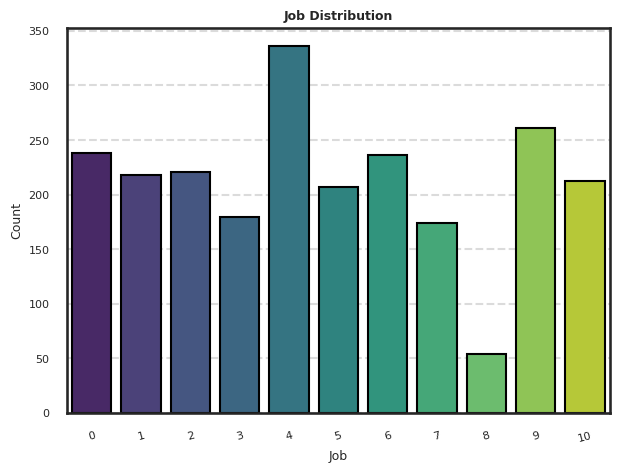

<ipython-input-559-e2cb4ba5116c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette="viridis", edgecolor='black')


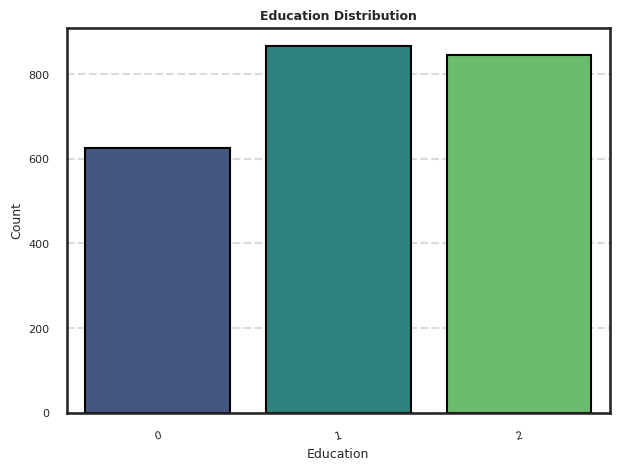

<ipython-input-559-e2cb4ba5116c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette="viridis", edgecolor='black')


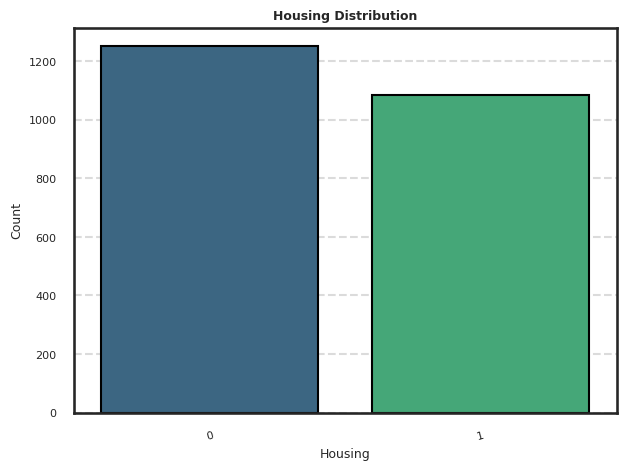

<ipython-input-559-e2cb4ba5116c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[var], palette="viridis", edgecolor='black')


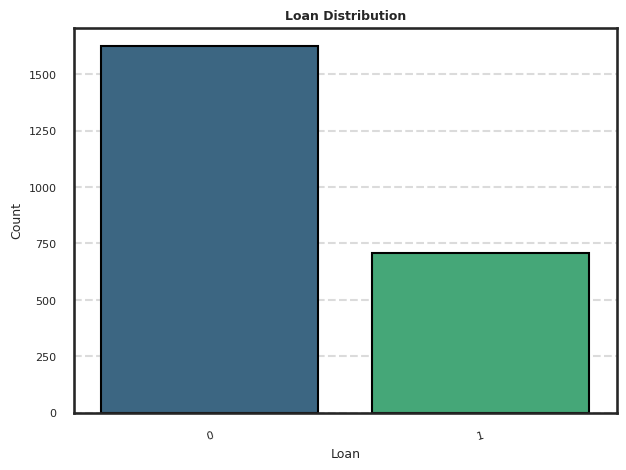

In [ ]:
#  function to get distribution of categorical variables
def categorical_distribution(df, categorical_vars):
    """
    Plots count distributions for categorical variables.
    """
    for var in categorical_vars:
        plt.figure(figsize=(7, 5))
        sns.countplot(x=df[var], palette="viridis", edgecolor='black')

        plt.title(f"{var.capitalize()} Distribution", fontsize=9, fontweight='bold')
        plt.xticks(fontsize=8, rotation=15)
        plt.yticks(fontsize=8)
        plt.xlabel(var.capitalize(), fontsize=9)
        plt.ylabel("Count", fontsize=9)
        plt.grid(axis='y', linestyle='--', alpha=0.7)

        plt.show()

#  categorical variables
categorical_vars = ['job', 'education', 'housing', 'loan']
categorical_distribution(df_outliers, categorical_vars)

<ipython-input-576-8c9c990ff870>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_balance_profiles["age_group"] = high_balance_profiles["age"].apply(lambda x: "Older (50+)" if x >= 50 else "Younger (<50)")
<ipython-input-576-8c9c990ff870>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=high_balance_profiles, x="age_group", y="balance", palette="coolwarm", showfliers=False) #Remove outliers for better visualization


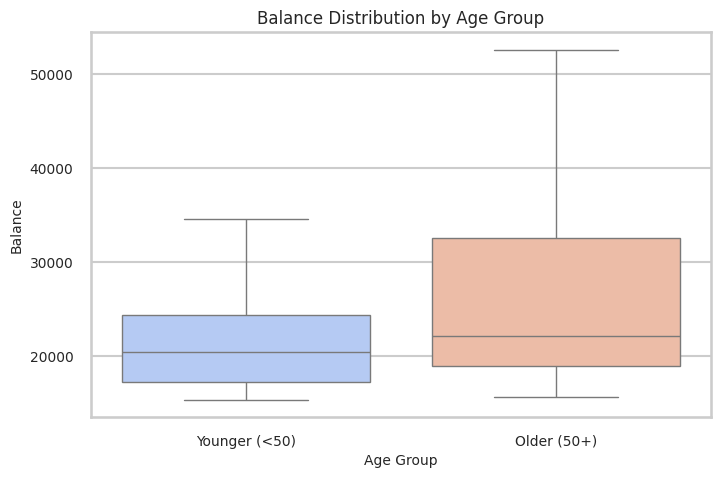

<ipython-input-576-8c9c990ff870>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=high_balance_profiles, x="housing", y="balance", palette="coolwarm", showfliers=False) #Remove outliers


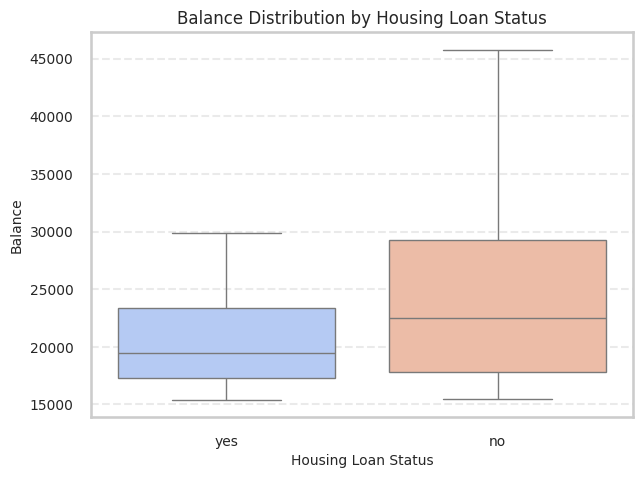

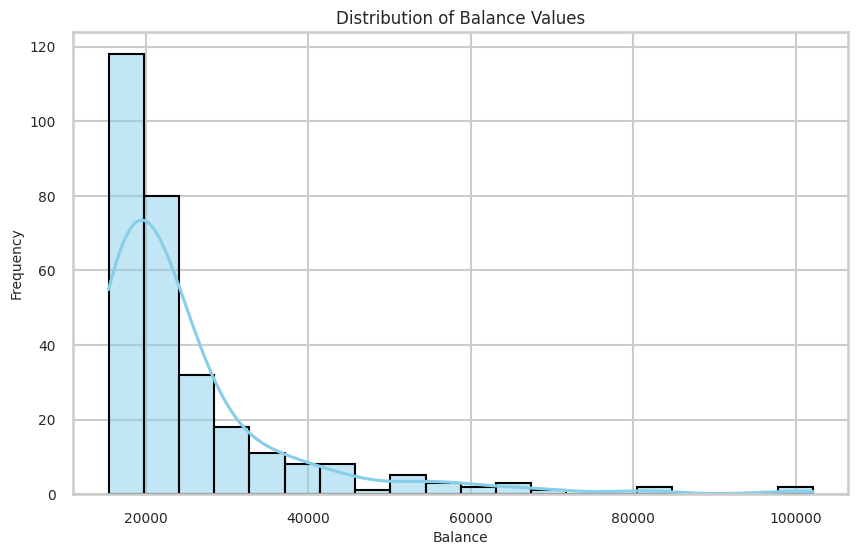

In [ ]:
# Distribution: Younger and Older age groups
high_balance_profiles["age_group"] = high_balance_profiles["age"].apply(lambda x: "Older (50+)" if x >= 50 else "Younger (<50)")

# Compare balance between age groups
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
sns.boxplot(data=high_balance_profiles, x="age_group", y="balance", palette="coolwarm", showfliers=False)

plt.title("Balance Distribution by Age Group", fontsize=12)
plt.xlabel("Age Group", fontsize=10)
plt.ylabel("Balance", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Distribution of Balance for people having and not having Housing Loan
plt.figure(figsize=(7, 5))
sns.boxplot(data=high_balance_profiles, x="housing", y="balance", palette="coolwarm", showfliers=False)
sns.set_style("whitegrid")
plt.title("Balance Distribution by Housing Loan Status", fontsize=12)
plt.xlabel("Housing Loan Status", fontsize=10)
plt.ylabel("Balance", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.show()


# looking at histogram of balance distribution
plt.figure(figsize=(10, 6))
sns.histplot(high_balance_profiles["balance"], kde=True, color="skyblue", bins=20, edgecolor="black")
plt.title("Distribution of Balance Values", fontsize=12)
plt.xlabel("Balance", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


job_map= {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

**Observations**: **"Management"** has the highest count (~350), meaning most clients in the dataset work in management.
**Technician and Admin** also have relatively high counts, suggesting these are other common professions.
Student has the lowest count, indicating fewer young individuals in the dataset.
Services and Housemaid also appear less frequently.

Education type: The largest groups belong to **Primary (1) and Secondary (2) education levels**, each having more than 800 clients.
This suggests that most clients have at least a basic level of education but may not have attended university.

Housing Loan: The bar for No Housing loan is higher than having housing loan(1). This suggests that portion of customers either already own a home, or do not have mortage commitments, although the bar for No housing loan is higher than no housing loan, but there is a significant portion of people in outlier data as who have
Housing loan, these people have higher financial commitments.

Personal Loan: Around 700 people do have personal loans, this group may require loan repayment support, refinancing, or additional credit options.


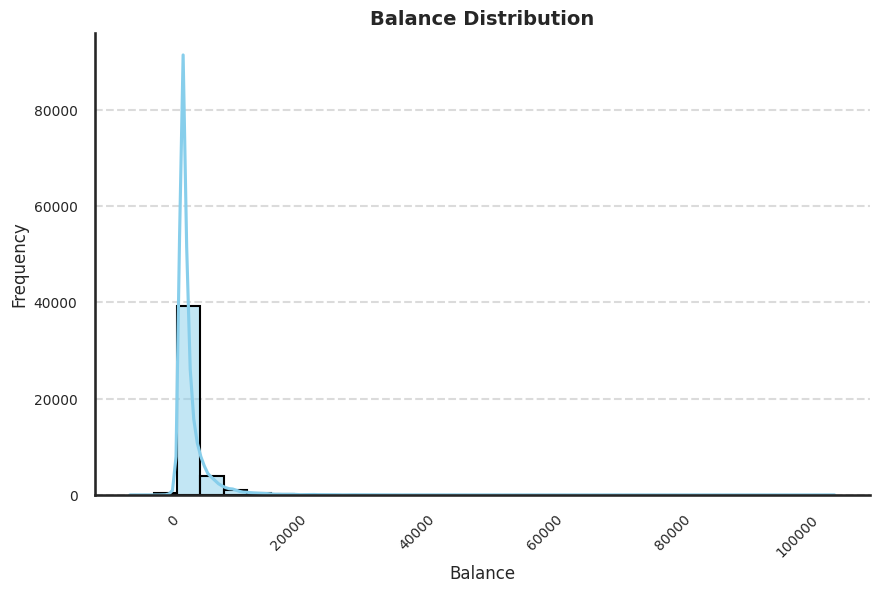

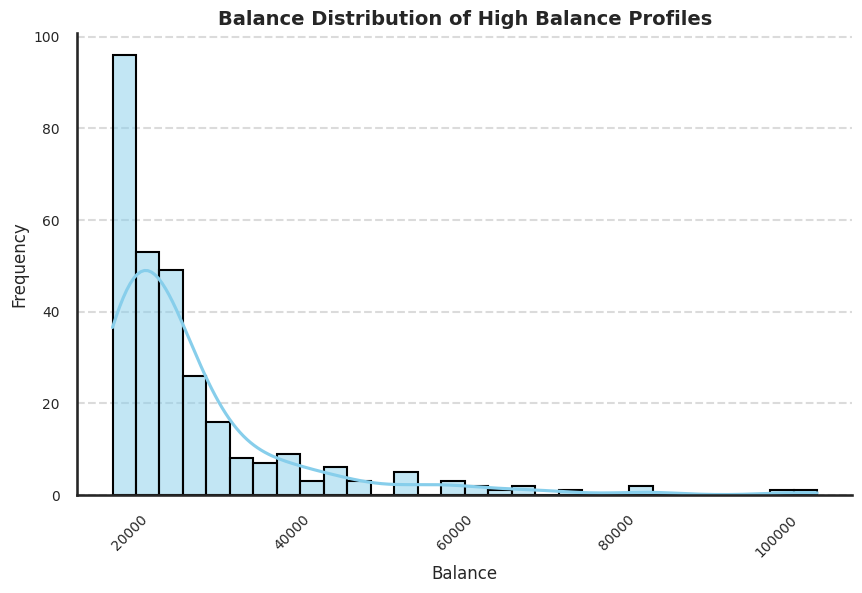

In [ ]:

def plot_balance_distribution(df, title="Balance Distribution"):

    plt.figure(figsize=(10, 6))
    sns.histplot(df['balance'], kde=True, bins=30, color='skyblue', edgecolor='black')

    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel("Balance", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(fontsize=10, rotation=45, ha="right")
    plt.yticks(fontsize=10)

    plt.grid(axis='y', linestyle='--', alpha=0.7)
    sns.despine()

    plt.show()
plot_balance_distribution(combined_df)

# balance distribution for the high_balance_profiles
plot_balance_distribution(high_balance_profiles, title="Balance Distribution of High Balance Profiles")


**Segments:**
1. People with High Balance, Retirees with High Balance
2. People with Education type: Primary and Secondary level
3. People with Job type: Management and Blue Collar jobs

**Recommendations**:

**Offer Competitive Refinancing Options**: Lower interest rates can help retain high-balance customers and
improve their financial well-being.

Introduce Profession-Based Financial Products:

Low-interest personal loans for **blue-collar workers.**

**Salary-based** credit card offers tailored to **earning potential**.

Provide Premium Investment Options: Personalized financial advice and **high-yield investment options** for **retirees and high-balance customers**.

Data-Driven Product Recommendations: Utilize spending patterns and financial goals to suggest relevant banking products.

Loyalty and Reward Programs:

Encourage customers to maintain higher balances through exclusive benefits.

Implement rewards for financial milestones.

**Launch Zero-Fee Student and Basic Accounts**:

**Digital-first checking accounts** for primary and secondary education level individuals.

**"No Jargon"** campaigns to improve accessibility and financial literacy.


**Challenges and Limitations:**

Firstly, Google collab related issues occured during analysis after K-prototype analysis, Runtime had to be connected to local RAM as GPU was not being able to connect, secondly, the collab kept crashing, codes were not running properly, some regular codes which should run like merging data, or creating histogram, some codes did not run at all.

**Future Steps:**

We can look at supplementing more data from Portugese bank to see the current cluster with most recent data, perhaps do an investigative exploration to study smaller clusters, look further into more financial data, we had many irrelevant columns so that restricted study of financial behavioural characteristics. Secondly, we can look at mixed clusters as in look at financial and other features like education, or job type or age, gender together for different age bins, gender types, and education types.

**Generative AI declaration:**

It was used to brainstorm, refine codes, debug issues in codes, ChatGPT, Gemini, and Perplexity was used. Attached is the link for Gen AI and references used in this Collab.
https://docs.google.com/document/d/1EgjJluSNxqdCnxoNz_fpIjYyP1kq8EVX/edit
